In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [3]:
load_path = r'../preprocessing_data/'
load_sub = r'../data/'

train_df = pd.read_csv(load_path + 'preprocessed_train.csv')
test_df = pd.read_csv(load_path + 'preprocessed_test.csv')
submission = pd.read_csv(load_sub + 'submission.csv')

# Data Preprocessing

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X = train_df.drop(['box_off_num'], axis = 1)
y = train_df['box_off_num']

In [6]:
train_x, valid_x, train_y, valid_y = train_test_split(X, y, test_size = 0.2, random_state = 2024)

# SVM

In [7]:
from sklearn.svm import SVR

from sklearn.metrics import mean_absolute_error, root_mean_squared_error

In [8]:
svm = SVR()
svm.fit(train_x, train_y)

svm_pred = svm.predict(valid_x)

svm_mae = mean_absolute_error(valid_y, svm_pred)
svm_rmse = root_mean_squared_error(valid_y, svm_pred)

print(f'''
SVM
    MAE : {svm_mae}
    RMSE : {svm_rmse}
''')


SVM
    MAE : 649938.9463260785
    RMSE : 1768330.9951677313



# visualization

In [9]:
valid_y.shape

(120,)

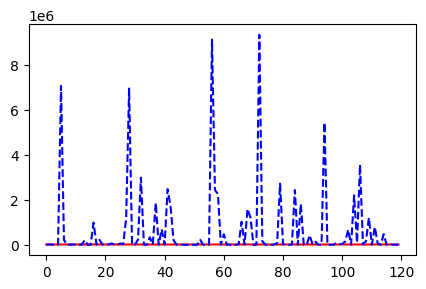

In [10]:
plt.figure(figsize = (5, 3))

plt.plot(range(120), svm_pred, color = 'red')
plt.plot(range(120), valid_y, color = 'blue', linestyle = '--')

plt.show()

# test data

In [11]:
test_x = test_df

test_pred = svm.predict(test_x)

In [12]:
submission['box_off_num'] = test_pred

submission

,title,box_off_num
0,용서는 없다,13032.352450
1,아빠가 여자를 좋아해,13031.610505
2,하모니,13035.140875
3,의형제,13034.877310
4,평행 이론,13034.185669
...,...,...
238,해에게서 소년에게,13024.577726
239,울보 권투부,13024.937503
240,어떤살인,13030.169476
241,말하지 못한 비밀,13026.211956


In [13]:
submission.shape

(243, 2)

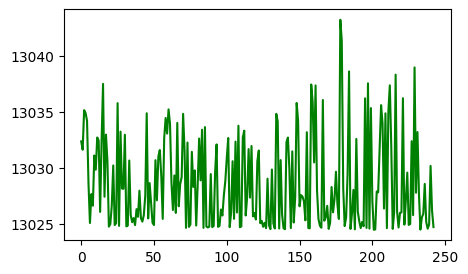

In [15]:
plt.figure(figsize = (5, 3))

plt.plot(range(submission.shape[0]), test_pred, color = 'green')

plt.show()

In [16]:
cond = submission['box_off_num'] == max(test_pred)

submission[cond]

,title,box_off_num
178,명량,13043.187962


In [17]:
sorted_sub = submission.sort_values(['box_off_num'], ascending = False)

sorted_sub[:5]

,title,box_off_num
178,명량,13043.187962
179,군도: 민란의 시대,13041.328101
229,베테랑,13038.942829
184,기술자들,13038.590081
216,장수상회,13038.297762
